In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
path = os.getcwd()

if path[1:5] == "Home":
    %run /Home/siv30/wad005/master/GRB/src/paths/uib.ipynb
else:
    %run /Users/andreas/phys/master/GRB/src/paths/mac.ipynb


All MAC paths are set!


In [4]:
HED_DRM = pd.read_csv(drm_path+fn, sep=' ',header=None).T.to_numpy(dtype=np.float32)

NameError: name 'fn' is not defined

In [28]:
filenames = os.listdir(drm_path)
filenames.remove('.DS_Store')

phi_angles, theta_angles = [],[]
for fn in filenames:
    theta,phi = fn.split("_")[-2], fn.split("_")[-1][:-4]
    theta_angles.append(theta)
    phi_angles.append(phi)

phi_angles, theta_angles, sort_index = np.asanyarray(phi_angles), np.asanyarray(theta_angles), np.argsort(phi_angles)
phi_angles, theta_angles = phi_angles[sort_index], theta_angles[sort_index]

for t in zip(theta_angles,phi_angles):
    print(f'{t[0]}, {t[1]}')

In [4]:
%matplotlib inline

['HED_drm_mats_90.00_120.00.txt', 'HED_drm_mats_90.00_-120.00.txt']


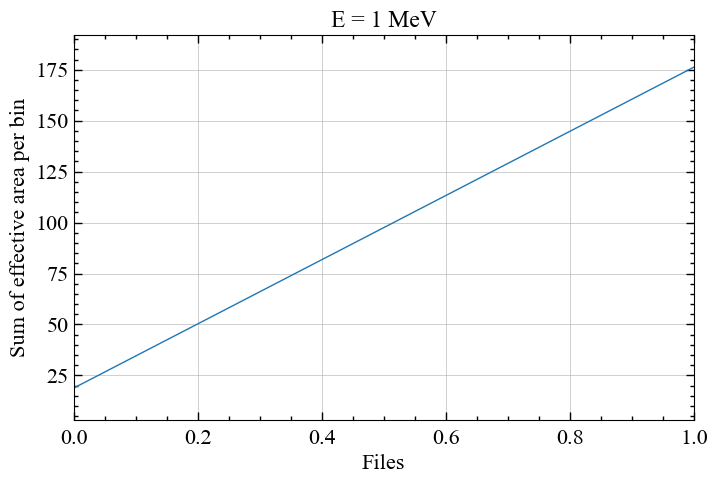

In [36]:
eff_area = []
crit_phi_angle = '120.00'
crit_theta_angle = '90.00'
filenames = [fn for fn in os.listdir(drm_path) if crit_phi_angle in fn.split("_")[-1][:-4] and crit_theta_angle in fn.split("_")[-2]]
print(filenames)
for fn in filenames:
    HED_DRM = pd.read_csv(os.path.join(drm_path, fn), sep=' ', header=None).T.to_numpy(dtype=np.float32)
    eff_area.append(sum(HED_DRM[20,:]))
    #find out how the DRM is structured. Effective area is the sum of the 20 bin (1 MeV), over all other bins
    
eff_area = np.array(eff_area, dtype=np.float16)

plt.plot(eff_area)
plt.xlabel('Files')
plt.ylabel('Sum of effective area per bin')
plt.title('E = 1 MeV')
plt.grid()
plt.show()


In [23]:
eff_area

array([496.8  ,   5.793, 514.   , 197.9  ,  18.8  , 239.2  , 673.   ,
       219.1  , 100.5  , 665.   ,   2.988, 266.5  ,  47.4  ],
      dtype=float16)

In [48]:
en = np.array([0.0100,0.0126,0.0158,0.0200  ,0.0251  ,0.0316  ,0.0398  ,0.0501  ,0.0631,  0.0794,  0.1000  ,0.1259  ,0.1585  ,0.1995  ,0.2512  ,0.3162  ,0.3981  ,0.5012  ,0.6310  ,0.7943  ,1.0000,  1.2589,  1.5849,  1.9953,  2.5119,  3.1623,  3.9811,  5.0119  ,6.3096,  7.9433,  10.0000,  12.5893,  15.8489,  19.9526, 25.1189, 31.6228 ,39.8107 ,50.1187 ,63.0957 ,79.4328 ,100.0000],dtype=np.float16)
print(f'{round(en[17]*1e3,2)} keV')
print(f'{en[20]} MeV')

500.98 keV
1.0 MeV


In [54]:
diff = np.diff(eff_area,prepend=True)
for t in zip(diff,phi_angles):
    print(t)

(277.8, -180.0)
(14.0, -165.0)
(9.75, -150.0)
(15.25, -135.0)
(18.25, -120.0)
(9.75, -105.0)
(1.5, -90.0)
(-4.25, -75.0)
(-9.5, -60.0)
(-17.5, -45.0)
(-15.0, -30.0)
(-11.25, -15.0)
(-8.5, 0.0)
(16.75, 15.0)
(7.5, 30.0)
(-37.5, 45.0)
(-243.2, 60.0)
(-16.0, 75.0)
(-1.195, 90.0)
(13.39, 105.0)
(-15.11, 120.0)
(90.94, 135.0)
(172.0, 150.0)
(29.75, 165.0)
(-13.5, 180.0)
